Импорт библиотек

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.layers as layers

Модуль для ограничения потребления видеопамяти (4 гига)

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (28, 28)

Загрузка данных для обучения и тестирования

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [5]:
print('X_train: '  + str(x_train.shape))
print('Y_train: '  + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


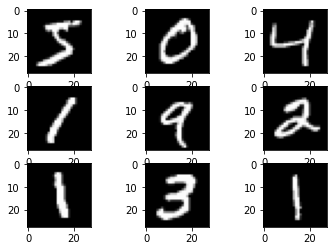

In [6]:
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [7]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='sigmoid')
])

Определение оптимизатора, метода расчета потерь и собираемых метрик

In [8]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

Обучение модели

In [9]:
result = model.fit(
    x=x_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(x_test,y_test),
    shuffle=True,
    verbose=True,
    use_multiprocessing = False)

Epoch 1/20
1875/1875 [==============================] - 22s 10ms/step - loss: 0.8785 - sparse_categorical_accuracy: 0.7224 - val_loss: 0.1524 - val_sparse_categorical_accuracy: 0.9556
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3399 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9667
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2607 - sparse_categorical_accuracy: 0.9213 - val_loss: 0.0862 - val_sparse_categorical_accuracy: 0.9733
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2181 - sparse_categorical_accuracy: 0.9347 - val_loss: 0.0601 - val_sparse_categorical_accuracy: 0.9805
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1955 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.0544 - val_sparse_categorical_accuracy: 0.9831
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.

Проверка точности

In [10]:
score = model.evaluate(x = x_train,y = y_train, verbose=1)
print('Точность на обучающай выборке: {}%'.format(score[1]*100))

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0230 - sparse_categorical_accuracy: 0.9930
Точность на обучающай выборке: 99.2983341217041%


In [11]:
score = model.evaluate(x = x_test,y = y_test, verbose=1)
print('Точность на тестовой выборке: {}%'.format(score[1]*100))

313/313 [==============================] - 2s 6ms/step - loss: 0.0283 - sparse_categorical_accuracy: 0.9912
Точность на тестовой выборке: 99.11999702453613%


Построение графиков

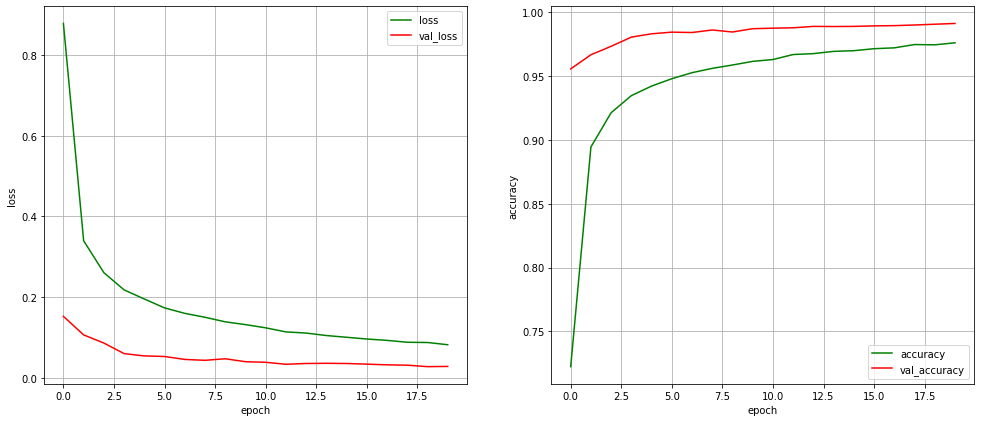

In [12]:
#Графики
px = 1/pyplot.rcParams['figure.dpi']
fig, (ax1,ax2) = pyplot.subplots(ncols=2, figsize=(1200*px,500*px))

ax1.plot(result.history['loss'], color='green')
ax1.plot(result.history['val_loss'], color='red')
ax1.legend(['loss','val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.grid(True)

ax2.plot(result.history['sparse_categorical_accuracy'], color='green')
ax2.plot(result.history['val_sparse_categorical_accuracy'], color='red')
ax2.legend(['accuracy','val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.grid(True)